In [1]:
import networkx as nx

G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


In [2]:
G.add_node("A")
print(G)

G.add_nodes_from(["B", "C", "D", "E", "F", "G"])
print(G)

Graph with 1 nodes and 0 edges
Graph with 7 nodes and 0 edges


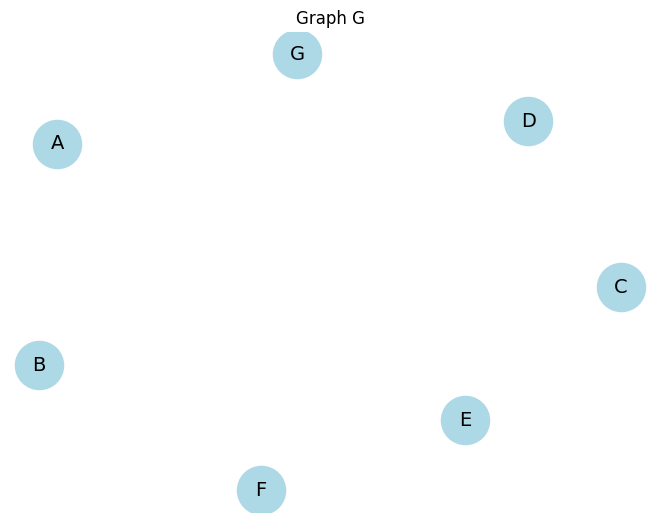

In [3]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=14)
plt.title("Graph G")
plt.show()

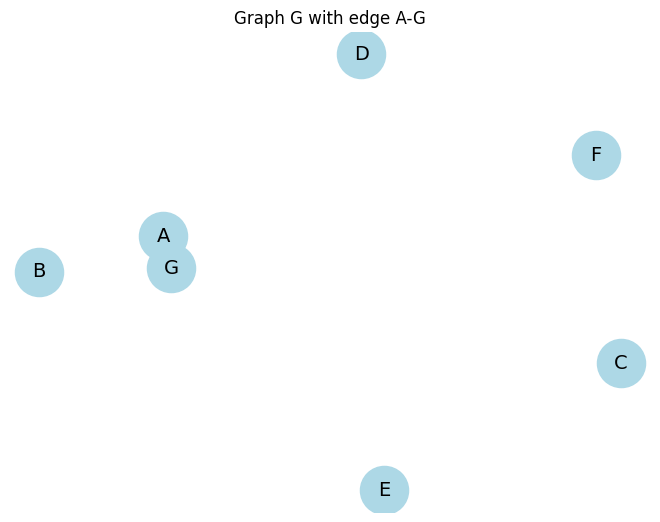

In [4]:
G.add_edge("A", "G")

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=14)
plt.title("Graph G with edge A-G")
plt.show()

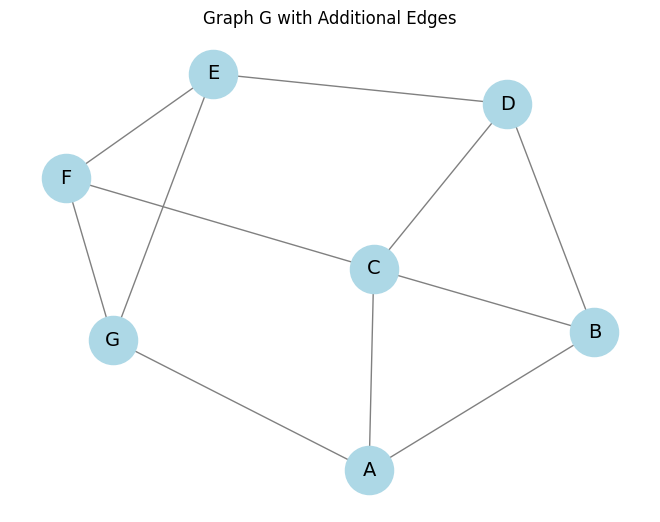

In [5]:
# Add 10 more edges using a list of tuples
more_edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "C"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
    ("E", "F"),
    ("F", "G"),
    ("E", "G"),
    ("C", "F")
]
G.add_edges_from(more_edges)

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=14)
plt.title("Graph G with Additional Edges")
plt.show()

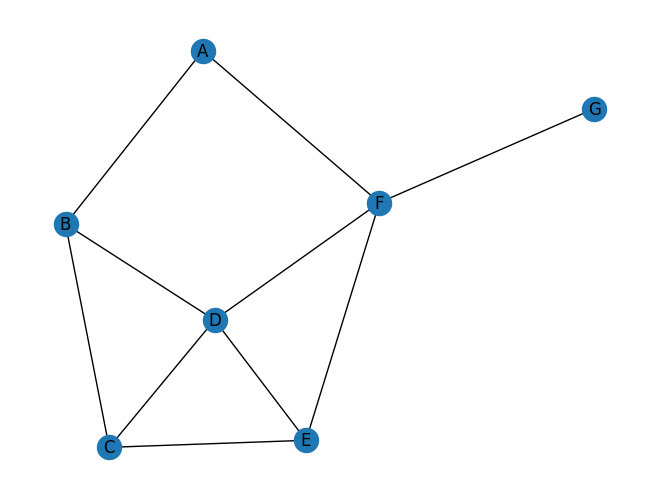

In [6]:
# Start with a fresh graph
G = nx.Graph()
 
# Add edges to the graph
edges_to_add = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"), ("F", "A"), 
                ("B", "D"), ("C", "E"), ("D", "F"), ("F", "G")]
G.add_edges_from(edges_to_add)

# Draw the graph with labels
nx.draw(G, with_labels=True)

# Display the graph
plt.show()

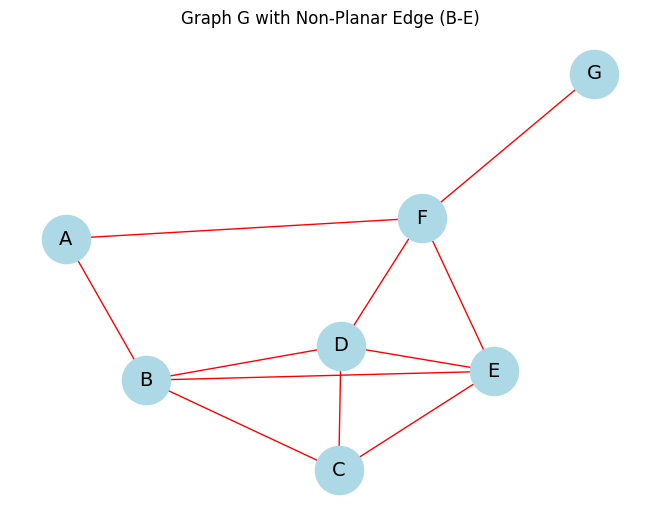

In [7]:
# Add an edge that makes the graph non-planar (e.g., add edge between "B" and "E")
G.add_edge("B", "E")

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='red', node_size=1200, font_size=14)
plt.title("Graph G with Non-Planar Edge (B-E)")
plt.show()

In [8]:
def find_all_paths(graph, start, end, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph.neighbors(start):
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for p in newpaths:
                paths.append(p)
    return paths

# Example usage:
all_paths = find_all_paths(G, "A", "B")
for p in all_paths:
    print(p)

['A', 'B']
['A', 'F', 'E', 'D', 'C', 'B']
['A', 'F', 'E', 'D', 'B']
['A', 'F', 'E', 'C', 'B']
['A', 'F', 'E', 'C', 'D', 'B']
['A', 'F', 'E', 'B']
['A', 'F', 'D', 'C', 'B']
['A', 'F', 'D', 'C', 'E', 'B']
['A', 'F', 'D', 'E', 'C', 'B']
['A', 'F', 'D', 'E', 'B']
['A', 'F', 'D', 'B']


In [9]:
from networkx import adjacency_matrix
import numpy as np

# Get the adjacency matrix as a NumPy array
adj_matrix = adjacency_matrix(G).todense()
print(adj_matrix)

[[0 1 0 0 0 1 0]
 [1 0 1 1 1 0 0]
 [0 1 0 1 1 0 0]
 [0 1 1 0 1 1 0]
 [0 1 1 1 0 1 0]
 [1 0 0 1 1 0 1]
 [0 0 0 0 0 1 0]]


In [10]:
# Calculate the matrix product (adjacency matrix squared)
adj_matrix_squared = adj_matrix @ adj_matrix
print(adj_matrix_squared)

[[2 0 1 2 2 0 1]
 [0 4 2 2 2 3 0]
 [1 2 3 2 2 2 0]
 [2 2 2 4 3 1 1]
 [2 2 2 3 4 1 1]
 [0 3 2 1 1 4 0]
 [1 0 0 1 1 0 1]]


In [11]:
adj_matrix_3p = adj_matrix @ adj_matrix @ adj_matrix
print(adj_matrix_3p)

[[ 0  7  4  3  3  7  0]
 [ 7  6  8 11 11  4  3]
 [ 4  8  6  9  9  5  2]
 [ 3 11  9  8  9 10  1]
 [ 3 11  9  9  8 10  1]
 [ 7  4  5 10 10  2  4]
 [ 0  3  2  1  1  4  0]]


In [12]:
# Assign a random weight between 0 and 1 to each node
for node in G.nodes():
    G.nodes[node]['weight'] = np.random.rand()

# Print node weights
for node in G.nodes(data=True):
    print(node)

('A', {'weight': 0.7652243087745305})
('B', {'weight': 0.003651689784535117})
('C', {'weight': 0.6130795685228272})
('D', {'weight': 0.5326561392162582})
('E', {'weight': 0.2503931457321529})
('F', {'weight': 0.8633721810575393})
('G', {'weight': 0.6337840125627939})


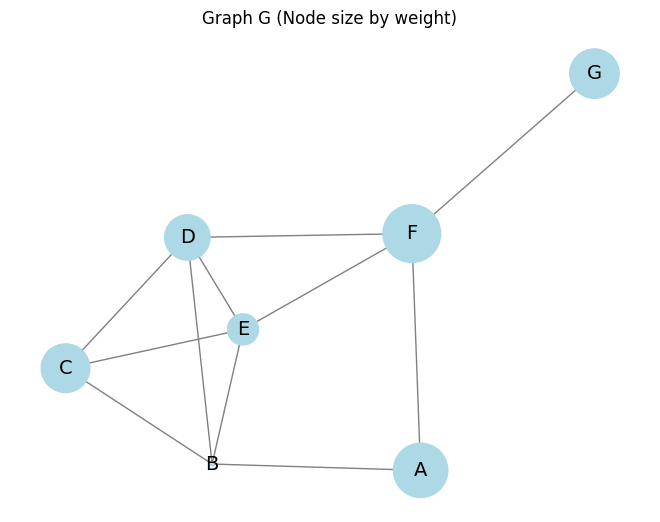

In [13]:
# Visualise the graph with node sizes proportional to their weights
node_weights = [G.nodes[node]['weight'] * 2000 for node in G.nodes()]
nx.draw(
    G,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_weights,
    font_size=14
)
plt.title("Graph G (Node size by weight)")
plt.show()

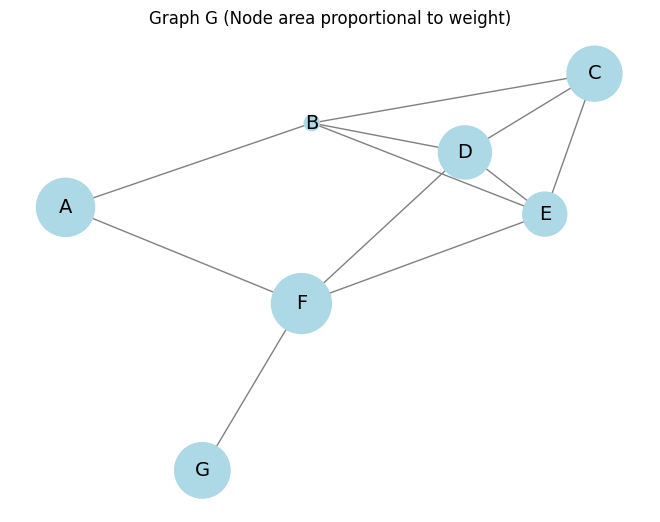

In [14]:
# Visualise the graph with node areas proportional to their weights (radius ~ sqrt(weight))
node_weights = [np.sqrt(G.nodes[node]['weight']) * 2000 for node in G.nodes()]
nx.draw(
    G,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_weights,
    font_size=14
)
plt.title("Graph G (Node area proportional to weight)")
plt.show()

In [15]:
import pandas as pd

df1 = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\rfid_lyon_contacts.csv")
df2 = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\rfid_lyon_people.csv")

display(df1)
display(df2)

,ID1,ID2,time
0,15,31,140
1,15,22,160
2,15,16,500
3,15,16,520
4,16,22,560
...,...,...,...
32419,37,63,347600
32420,49,63,347600
32421,31,37,347620
32422,49,63,347620


,ID,status
0,1,ADM
1,2,NUR
2,3,NUR
3,4,NUR
4,5,NUR
...,...,...
70,71,ADM
71,72,PAT
72,73,PAT
73,74,PAT


In [16]:
# Construct a MultiGraph from the contact data, using 'time' as edge attribute
MG = nx.from_pandas_edgelist(df1, source="ID1", target="ID2", edge_attr="time", create_using=nx.MultiGraph())

# Add 'status' as a node attribute
status_dict = pd.Series(df2.status.values, index=df2.ID).to_dict()
nx.set_node_attributes(MG, status_dict, "status")

print(MG)

MultiGraph with 75 nodes and 32424 edges


In [17]:
# Check if MG is a MultiGraph or a simple Graph
if isinstance(MG, nx.MultiGraph):
    print("MG is a MultiGraph.")
elif isinstance(MG, nx.Graph):
    print("MG is a simple Graph.")
else:
    print("MG is neither a MultiGraph nor a simple Graph.")

MG is a MultiGraph.


In [18]:
# Convert the MultiGraph MG to a simple Graph SG
SG = nx.Graph()

# Add edges with 'count' attribute (number of multi-edges between nodes)
for u, v in MG.edges():
    if SG.has_edge(u, v):
        continue  # Already counted this edge
    count = MG.number_of_edges(u, v)
    SG.add_edge(u, v, count=count)

# Copy node attributes (like 'status') from MG to SG
for n, d in MG.nodes(data=True):
    SG.nodes[n].update(d)

print(SG)

Graph with 75 nodes and 1139 edges


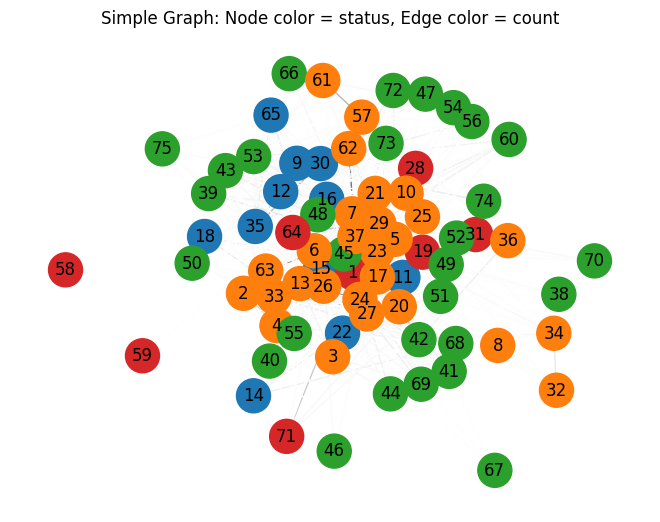

In [19]:
# Get unique statuses and assign a color to each
statuses = [SG.nodes[n].get('status', 'unknown') for n in SG.nodes()]
unique_statuses = list(set(statuses))
status_color_map = {status: plt.cm.tab10(i % 10) for i, status in enumerate(unique_statuses)}
node_colors = [status_color_map[SG.nodes[n].get('status', 'unknown')] for n in SG.nodes()]

# Get edge counts and normalize for colormap
edge_counts = [SG[u][v]['count'] for u, v in SG.edges()]
max_count = max(edge_counts) if edge_counts else 1
min_count = min(edge_counts) if edge_counts else 0

# Map counts to grayscale: 0 (white) to max (black)
def count_to_gray(count):
    if max_count == min_count:
        return (0, 0, 0)  # all black if only one value
    gray_level = 1 - (count - min_count) / (max_count - min_count)
    return (gray_level, gray_level, gray_level)

edge_colors = [count_to_gray(SG[u][v]['count']) for u, v in SG.edges()]

# Draw the graph
pos = nx.spring_layout(SG, seed=42)
nx.draw(
    SG,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=600,
    font_size=12
)
plt.title("Simple Graph: Node color = status, Edge color = count")
plt.show()

In [20]:
# Extract subgraph with edges having 'count' > 50
SG_sub = SG.copy()
edges_to_remove = [(u, v) for u, v, d in SG_sub.edges(data=True) if d['count'] <= 50]
SG_sub.remove_edges_from(edges_to_remove)

# Print all components and their members
components = list(nx.connected_components(SG_sub))
for i, comp in enumerate(components, 1):
    print(f"Component {i}: {comp}")

Component 1: {1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 39, 40, 42, 43, 44, 45, 48, 49, 51, 52, 53, 56, 60, 62, 63, 64, 65, 68, 69, 71, 72, 73, 74}
Component 2: {31}
Component 3: {2, 4}
Component 4: {38}
Component 5: {46}
Component 6: {75}
Component 7: {55}
Component 8: {67}
Component 9: {41}
Component 10: {50}
Component 11: {66}
Component 12: {47}
Component 13: {8}
Component 14: {70}
Component 15: {54}
Component 16: {32, 34}
Component 17: {59}
Component 18: {58}
Component 19: {57, 61}


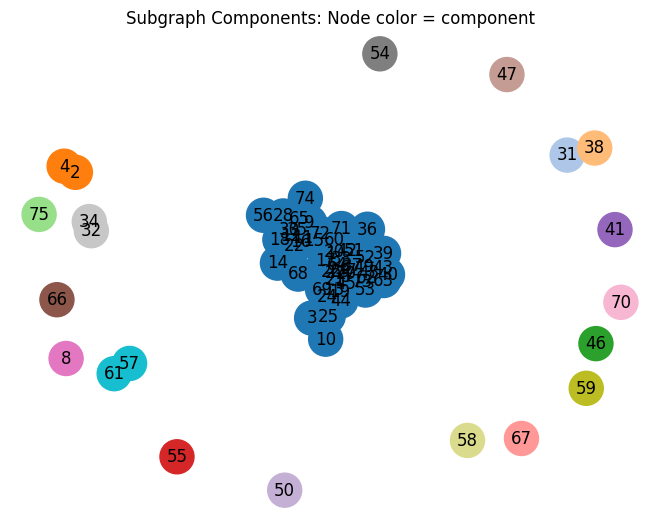

In [21]:
# Assign a unique color to each component
components = list(nx.connected_components(SG_sub))
component_color_map = {}
colors = plt.cm.tab20.colors  # Up to 20 unique colors

for idx, comp in enumerate(components):
    for node in comp:
        component_color_map[node] = colors[idx % len(colors)]

node_colors = [component_color_map.get(node, (0.5, 0.5, 0.5)) for node in SG_sub.nodes()]

# Draw the subgraph with node colors by component
pos = nx.spring_layout(SG_sub, seed=42)
nx.draw(
    SG_sub,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=600,
    font_size=12
)
plt.title("Subgraph Components: Node color = component")
plt.show()

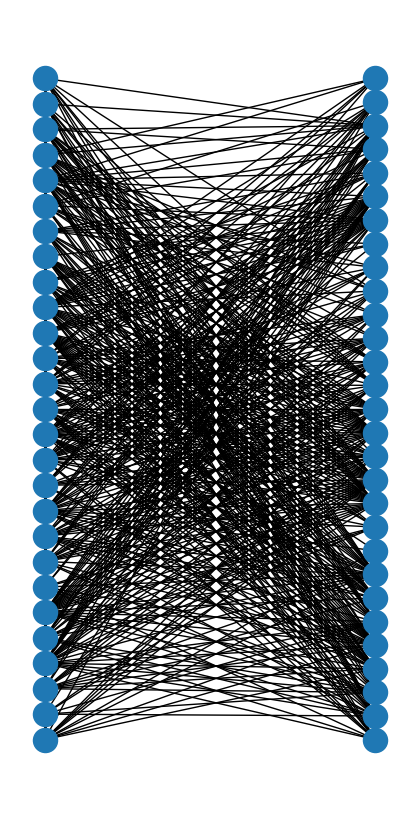

In [22]:
# Create the subgraph with nodes that are either "NUR" or "PAT"
G_bipartite = SG.subgraph(
    [node for node, data in SG.nodes(data=True) if data['status'] in ['NUR', 'PAT']]
).copy()

# Plotting
plt.figure(figsize=(4, 8), dpi=100)

# Set the layout algorithm to bipartite layout
nur_nodes = [node for node, data in G_bipartite.nodes(data=True) if data['status'] == 'NUR']
pos = nx.bipartite_layout(G_bipartite, nur_nodes)

# Draw the labels
nx.draw(G_bipartite, pos)

plt.show()

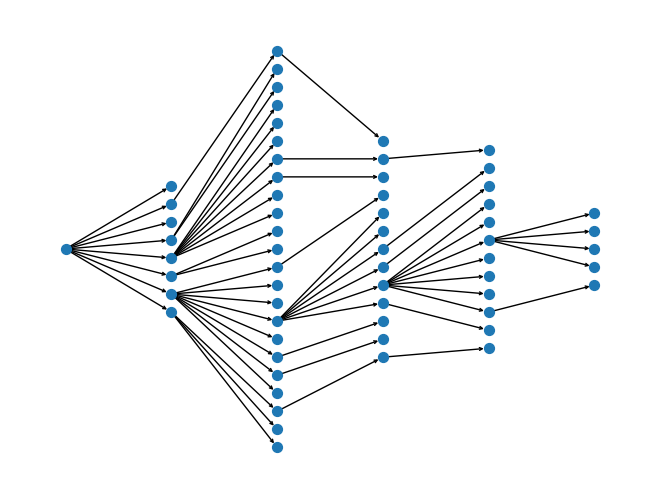

In [23]:
import random

def simulate_epidemic(G, p):
    """
    Simulates the spread of a disease through a population represented by a graph G,
    with each edge representing a possible transmission with probability p.
    
    Parameters:
    G (networkx.Graph or networkx.MultiGraph): The graph representing the population.
    p (float): The probability of infection transmission through an edge.
    
    Returns:
    networkx.Graph: The infection tree representing the spread of the disease.
    """
    # Set all nodes to 'susceptible'
    for node in G.nodes():
        G.nodes[node]['disease_status'] = 'susceptible'

    # Create an empty graph for the infection tree
    T = nx.Graph()

    # Pick a random vertex and infect it
    random_vertex = random.choice(list(G.nodes()))
    T.add_node(random_vertex)
    G.nodes[random_vertex]['disease_status'] = 'infected'

    # Set of currently infected nodes
    infected_set = set([random_vertex])

    while True:
        if not infected_set:
            break
        
        # Pick a random infected vertex
        infected_vertex = random.choice(list(infected_set))
        
        # Get the edges connected to the infected vertex
        edges = list(G.edges(infected_vertex))
        
        # Infect each neighbor via each edge with a probability p
        for edge in edges:
            neighbor = edge[1] if edge[0] == infected_vertex else edge[0]
            if G.nodes[neighbor]['disease_status'] == 'susceptible' and random.random() < p:
                G.nodes[neighbor]['disease_status'] = 'infected'
                T.add_edge(infected_vertex, neighbor)
                infected_set.add(neighbor)
        
        # Set the current infected vertex to recovered
        G.nodes[infected_vertex]['disease_status'] = 'recovered'
        infected_set.remove(infected_vertex)
    
    return T

# Example usage:
p = 0.007  # Define the infection probability
T = simulate_epidemic(MG, p)

# Draw the tree T using planar_layout
if len(T) == 1:
    pos = {list(T.nodes())[0]: (0, 0)}
else:
    pos = nx.bfs_layout(T, list(T.nodes())[0])

# Draw the tree with labels
nx.draw(T, pos, with_labels=False, node_size=50, arrows=True, arrowstyle='->', arrowsize=5)

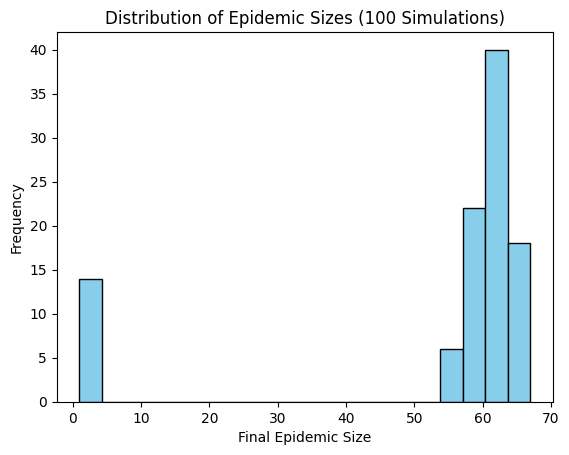

In [24]:
# Run the simulation 100 times and record epidemic sizes
epidemic_sizes = []
p = 0.007  # Infection probability

for _ in range(100):
    T = simulate_epidemic(MG, p)
    epidemic_sizes.append(len(T.nodes()))

# Plot histogram of epidemic sizes
plt.hist(epidemic_sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Final Epidemic Size')
plt.ylabel('Frequency')
plt.title('Distribution of Epidemic Sizes (100 Simulations)')
plt.show()

In [25]:
print(f"Mean: {np.mean(epidemic_sizes)}, Median: {np.median(epidemic_sizes)}, Min: {min(epidemic_sizes)}, Max: {max(epidemic_sizes)}")
print(np.mean([s/75 for s in epidemic_sizes]))

Mean: 52.95, Median: 61.0, Min: 1, Max: 67
0.7060000000000001


Estimated probability of epidemic (size >= 20): 0.860
95% Wilson CI: (0.779, 0.915)


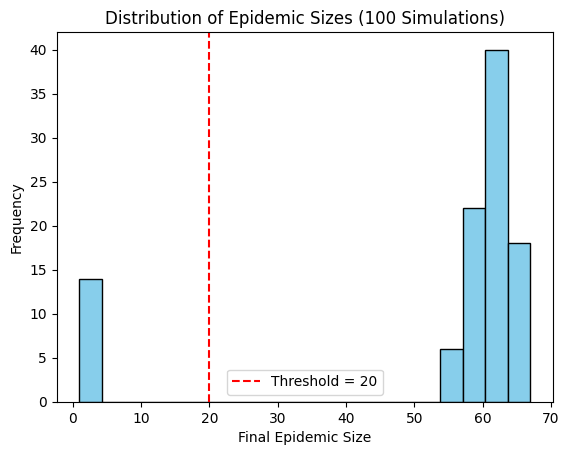

In [26]:
from statsmodels.stats.proportion import proportion_confint

# Define epidemic threshold
threshold = 20

# Calculate number of epidemics (size >= threshold)
num_epidemics = sum(s >= threshold for s in epidemic_sizes)
n = len(epidemic_sizes)
p_hat = num_epidemics / n

# Wilson 95% confidence interval
ci_low, ci_upp = proportion_confint(num_epidemics, n, alpha=0.05, method='wilson')

print(f"Estimated probability of epidemic (size >= {threshold}): {p_hat:.3f}")
print(f"95% Wilson CI: ({ci_low:.3f}, {ci_upp:.3f})")

# Plot histogram with threshold line
plt.hist(epidemic_sizes, bins=20, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Final Epidemic Size')
plt.ylabel('Frequency')
plt.title('Distribution of Epidemic Sizes (100 Simulations)')
plt.legend()
plt.show()

In [32]:
df = pd.read_excel("C:\\Users\\YuxinLi\\Downloads\\Supply chain logisitcs problem.xlsx")
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


### Customer and Product

In [36]:
df.shape

(9215, 14)

In [35]:
df['Customer'].nunique(), df['Product ID'].nunique()

(46, 772)

In [63]:
sample_customers = random.sample(list(df['Customer'].unique()), 10)
sample_products = random.sample(list(df['Product ID'].unique()), 50)
df_sub = df[(df['Customer'].isin(sample_customers))&(df['Product ID'].isin(sample_products))].copy()

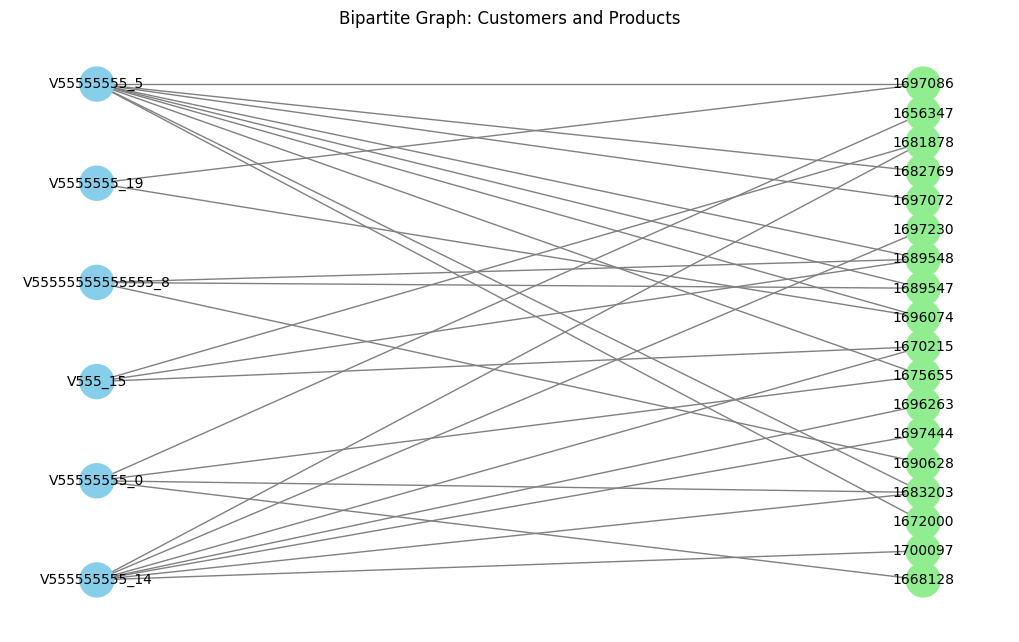

In [64]:
# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
customers = df_sub['Customer'].unique()
products = df_sub['Product ID'].unique()

B.add_nodes_from(customers, bipartite='customers')
B.add_nodes_from(products, bipartite='products')

# Add edges: customer bought product
for _, row in df_sub.iterrows():
    B.add_edge(row['Customer'], row['Product ID'])

# Draw the bipartite graph
plt.figure(figsize=(10, 6))
pos = nx.bipartite_layout(B, customers)
nx.draw(
    B, pos,
    with_labels=True,
    node_color=['skyblue' if n in customers else 'lightgreen' for n in B.nodes()],
    node_size=600,
    edge_color='gray',
    font_size=10
)
plt.title("Bipartite Graph: Customers and Products")
plt.show()

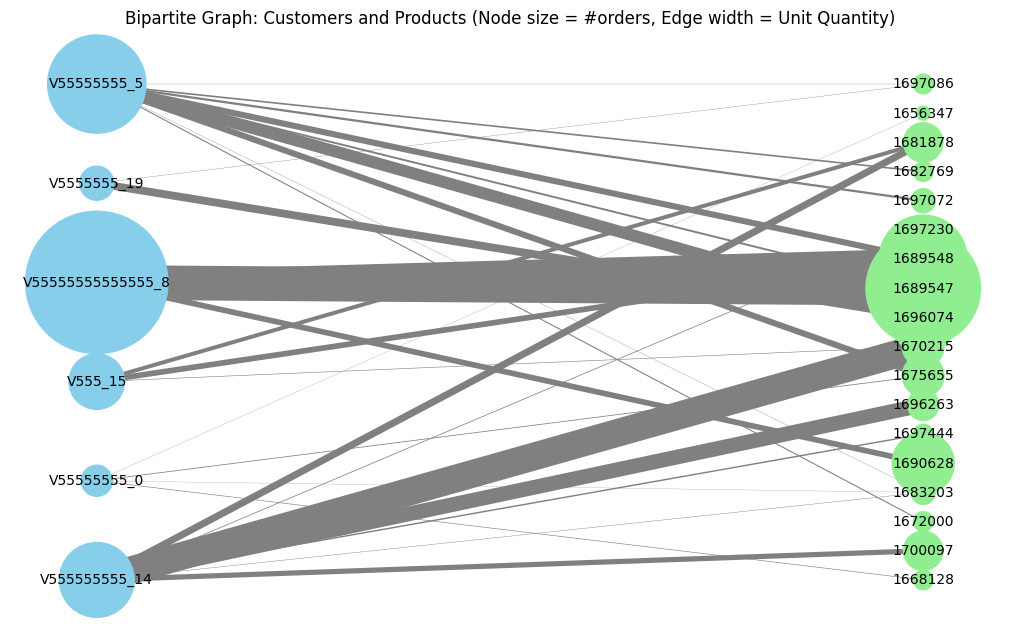

In [68]:
# Calculate node sizes: proportional to number of orders for each customer/product
customer_order_counts = df_sub['Customer'].value_counts()
product_order_counts = df_sub['Product ID'].value_counts()
node_sizes = []
for n in B.nodes():
    if n in customer_order_counts:
        node_sizes.append(customer_order_counts[n] * 100)  # scale for visibility
    elif n in product_order_counts:
        node_sizes.append(product_order_counts[n] * 100)
    else:
        node_sizes.append(100)

# Set edge weights proportional to 'Unit Quantity'
edge_widths = []
for u, v in B.edges():
    qty = df_sub[(df_sub['Customer'] == u) & (df_sub['Product ID'] == v)]['Unit quantity'].sum()
    edge_widths.append(qty / 1500 if qty > 0 else 1)  # scale for visibility

# Draw the bipartite graph with new node sizes and edge widths
plt.figure(figsize=(10, 6))
pos = nx.bipartite_layout(B, customers)
nx.draw(
    B, pos,
    with_labels=True,
    node_color=['skyblue' if n in customers else 'lightgreen' for n in B.nodes()],
    node_size=node_sizes,
    edge_color='gray',
    width=edge_widths,
    font_size=10
)
plt.title("Bipartite Graph: Customers and Products (Node size = #orders, Edge width = Unit Quantity)")
plt.show()

### Between Ports

In [42]:
df['Origin Port'].nunique(), df['Destination Port'].nunique()

(3, 1)

In [44]:
df['Origin Port'].unique(), df['Destination Port'].unique()

(array(['PORT09', 'PORT04', 'PORT05'], dtype=object),
 array(['PORT09'], dtype=object))

In [45]:
df['Origin Port'].value_counts()

Origin Port
PORT04    9041
PORT09     173
PORT05       1
Name: count, dtype: int64

In [46]:
df_sub = df[df['Origin Port'].isin(['PORT09', 'PORT05'])].copy()

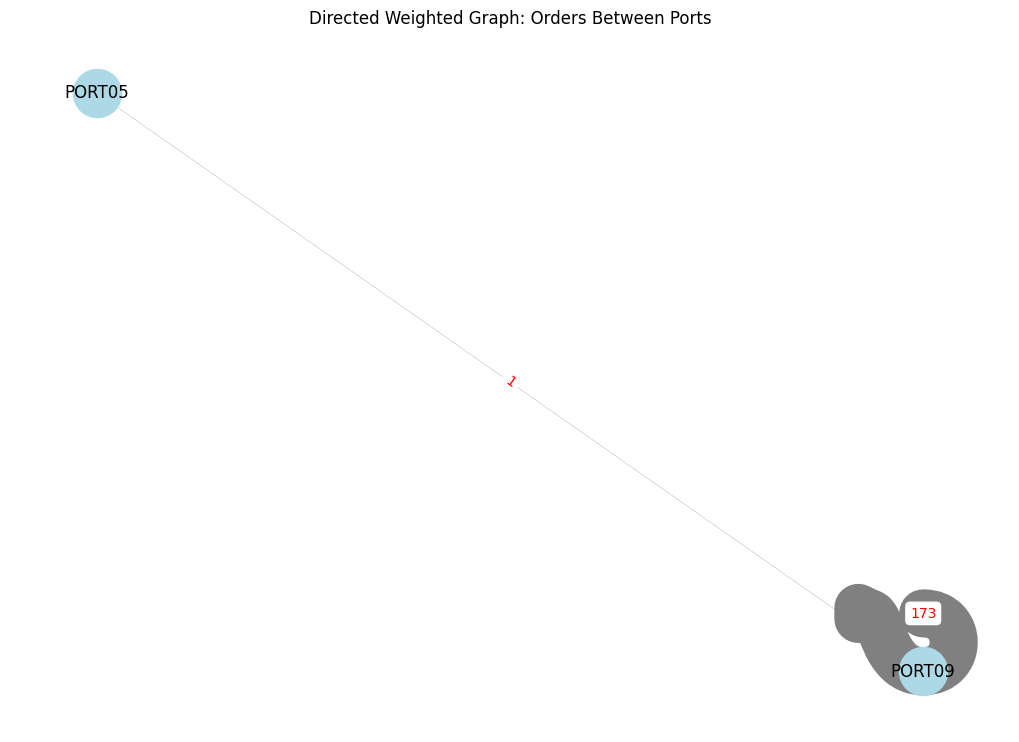

In [47]:
# Group by source and destination harbours, count number of orders
port_edges = df_sub.groupby(['Origin Port', 'Destination Port']).size().reset_index(name='order_count')

# Create a directed graph
DG = nx.DiGraph()

# Add weighted edges
for _, row in port_edges.iterrows():
    DG.add_edge(row['Origin Port'], row['Destination Port'], weight=row['order_count'])

# Draw the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(DG, seed=42)
edge_weights = [DG[u][v]['weight'] for u, v in DG.edges()]
nx.draw(
    DG, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=1200,
    edge_color='gray',
    width=[w/5 for w in edge_weights],  # scale for visibility
    arrowsize=20,
    font_size=12
)
# Draw edge labels (weights)
edge_labels = {(u, v): DG[u][v]['weight'] for u, v in DG.edges()}
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
plt.title("Directed Weighted Graph: Orders Between Ports")
plt.show()

### Product Pairs

In [58]:
selected_products = df['Product ID'].value_counts().head(10)

In [59]:
df_sub = df[df['Product ID'].isin(selected_products.index)].copy()

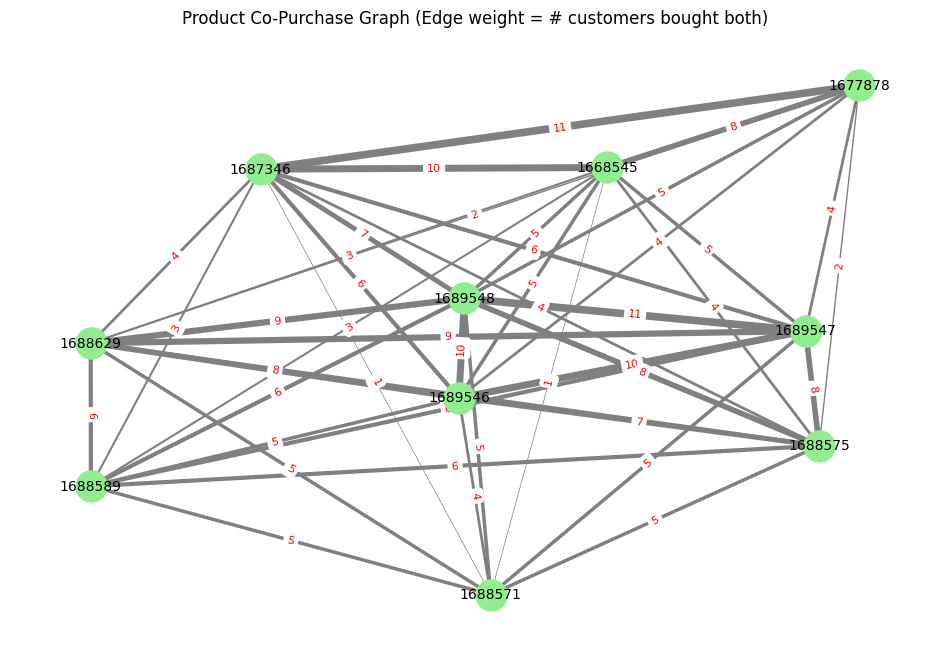

In [60]:
from itertools import combinations

# Create a product co-purchase graph
product_graph = nx.Graph()

# Get all unique products
products = df_sub['Product ID'].unique()
product_graph.add_nodes_from(products)

# Build a mapping: customer -> set of products bought
customer_products = df_sub.groupby('Customer')['Product ID'].apply(set)

# Count co-purchases for each product pair
from collections import Counter
pair_counter = Counter()
for prods in customer_products:
    for pair in combinations(sorted(prods), 2):
        pair_counter[pair] += 1

# Add edges with weights (number of customers who bought both)
for (prod1, prod2), weight in pair_counter.items():
    product_graph.add_edge(prod1, prod2, weight=weight)

# Draw the graph (only edges with weight > 0)
edges, weights = zip(*[((u, v), d['weight']) for u, v, d in product_graph.edges(data=True) if d['weight'] > 0])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(product_graph, seed=42)
nx.draw_networkx_nodes(product_graph, pos, node_color='lightgreen', node_size=500)
nx.draw_networkx_labels(product_graph, pos, font_size=10)
nx.draw_networkx_edges(product_graph, pos, edgelist=edges, width=[w/2 for w in weights], edge_color='gray')
nx.draw_networkx_edge_labels(product_graph, pos, edge_labels={(u, v): w for (u, v), w in zip(edges, weights)}, font_color='red', font_size=8)
plt.title("Product Co-Purchase Graph (Edge weight = # customers bought both)")
plt.axis('off')
plt.show()